Implementation of Plestenjak's Planar Graph Drawing Algorithm

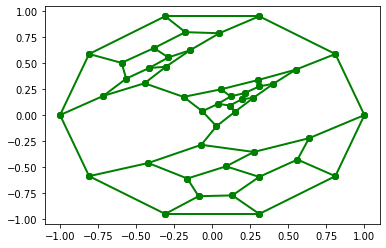

In [110]:
import math
import random
import numpy as np
import networkx as nx
import networkx.algorithms.cycles as cyc
import matplotlib.pyplot as plt

#testing Tutte Graph
G = nx.tutte_graph() #[0, 1, 2, ..., 44, 45]
n = len(G.nodes)

#recommended parameters
C = math.sqrt(n / math.pi)
def cool(i):
  return math.sqrt(math.pi / n) / ((1 + (math.pi / n) * i ** (3 / 2)))

#actual algorithm, adds the coordinates to each node. We can automate the maxIteration
def PlanarEmbed(G, C, cool, max):
    #at the moment, random source and ignore orientation (good)
    source = random.sample(list(G.nodes), 1)[0]
    outerCycle = list(cyc.find_cycle(G, source=source))
    #get inner and outer node sets
    outerNodes = [e[0] for e in outerCycle]
    innerNodes = [v for v in G.nodes if not v in outerNodes]

    #step 1
    q = len(outerNodes)
    for i in range(q): #for outer nodes, unit circle coordinates
        v = outerNodes[i]
        angle = (2 * math.pi * i) / q
        x, y = math.cos(angle), math.sin(angle)
        G.nodes[v]["position"] = np.array([x, y], dtype=float)

    for v in innerNodes: #for inner nodes, zero vector coordinate
        G.nodes[v]["position"] = np.zeros(2, dtype=float)

    #step 2
    for i in range(max):
        for v in G.nodes: #a: set the force to 0 for all v
            G.nodes[v]["force"] = np.zeros(2, dtype=float)
        
        for e in G.edges: #b: adjust force for inner and outer v
            u = e[0]
            v = e[1]
            posv = G.nodes[v]["position"]
            posu = G.nodes[u]["position"]
            F = C * np.power((posv - posu), 3)
            G.nodes[u]["force"] += F
            G.nodes[v]["force"] -= F
        
        for v in innerNodes: #c: move coordinates for inner v
            F = G.nodes[v]["force"]
            d = np.linalg.norm(F)
            if (d > 0): #avoids div by 0, not all inner are neighbors to outers
                G.nodes[v]["position"] += (min([d, cool(i)]) / d) * F 

def PlotGraph(G):
    for e in G.edges:
        u = e[0]
        v = e[1]
        pos1 = G.nodes[u]["position"]
        pos2 = G.nodes[v]["position"]
        x1, x2 = pos1[0], pos2[0]
        y1, y2 = pos1[1], pos2[1]
        plt.plot([x1, x2], [y1, y2], 'go-', linewidth=2)

PlanarEmbed(G, C, cool, 500)
PlotGraph(G)


References:

---

B. Plestenjak, 'An Algorithm for Drawing Planar Graphs' https://www.fmf.uni-lj.si/~plestenjak/Papers/schlegel